# Data Science Regression Project: Predicting Home Prices in Banglore

In [1]:
import numpy as np
import pandas as pd
import matplotlib

Load into a dataframe 

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
grouped_data=df.groupby('area_type')
grouped_data

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
for inx,x in grouped_data:
    print(inx)
    print( )
    print(x)

Built-up  Area

            area_type   availability               location       size  \
2      Built-up  Area  Ready To Move            Uttarahalli      3 BHK   
13     Built-up  Area  Ready To Move              Gottigere      2 BHK   
20     Built-up  Area  Ready To Move                Kengeri      1 BHK   
27     Built-up  Area         20-Dec             Whitefield      3 BHK   
34     Built-up  Area  Ready To Move          Kasturi Nagar      3 BHK   
...               ...            ...                    ...        ...   
13280  Built-up  Area  Ready To Move               Sarjapur      3 BHK   
13307  Built-up  Area  Ready To Move           Billekahalli      3 BHK   
13308  Built-up  Area  Ready To Move      Bannerghatta Road      3 BHK   
13315  Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13317  Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   

       society total_sqft  bath  balcony  price  
2          NaN       1440   2.0      3.0   62

In [7]:
#using aggrigation we can find the max,count,sum..... of the group
grouped_data['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Chech the null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
# null_value=df.isnull().sum()

# null_value



Delete the less importent columns

In [11]:

df1=df.drop(["society","availability","balcony","area_type"],axis=1)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Data Cleaning


Handle NA values

In [12]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df2=df1.dropna()
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


""We had removed all the rows's contaning null values""

In [14]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature Engineering

Now we convert the size columb to integer by removing the bhk or beadroom and get the numerical values

In [15]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

select the column size and creat a new columb "BHK" and store the numaric data og size by getinign only number by using apply function and lambda split
apply() is use to apply any function on columb
and then we itrate the cloumb by lambda and split it on the bases of space and get the 0 index data which is number

In [16]:
df2["BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Chandra\AppData\Local\Temp\ipykernel_28680\2540858533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [17]:
df2

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
df2["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

df2['total_sqft'].unique()

Along with integer we have range value like 1133-1384..... we have to replace by average value
and also we have the values like 3006meter which contain string so we replace it with pd.na which is null 
and after we remove the null value by dropna()

In [19]:
def calculate_average(range_string):
    try: 
        if '-' in range_string:
            x=range_string.split('-')
            start=float(x[0])
            end=float(x[1])
            # start, end = map(int, range_string.split('-'))
            return (start + end) / 2
        else:
            return float(range_string)
    except:
        return pd
df3=df2.copy()
df3["total_sqft"]=df3["total_sqft"].apply(calculate_average)

In [20]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [21]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
df3["total_sqft"].unique()

array([1056.0, 2600.0, 1440.0, ..., 1258.5, 774.0, 4689.0], dtype=object)

In [23]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [24]:
df3.shape

(13246, 6)

In [25]:
df3=df3.dropna()

In [26]:
df3.shape

(13246, 6)

In [27]:
print(df3.dtypes)

location       object
size           object
total_sqft     object
bath          float64
price         float64
BHK             int64
dtype: object


In [28]:
df3['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [29]:
print(df3.dtypes)


location       object
size           object
total_sqft    float64
bath          float64
price         float64
BHK             int64
dtype: object


In [30]:
df3['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

# Feature Engineering

Add new feature called price per square feet

In [31]:
df4=df3.copy()
df4["price_per_sqt"]=df3["price"]*100000/df3["total_sqft"]
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [32]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [33]:
len(df4['location'].unique())

1304

we have 1298 unique location which is lot to handel

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [34]:
df4['location']=df4['location'].apply(lambda x :x.strip())

In [35]:
df4.groupby("location")['location'].agg('count').sort_values(ascending=False)


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [36]:
dfc=df4.groupby("location")['location'].agg('count').sort_values(ascending=False)

# Dimensionality Reduction

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [37]:
df_less_10=dfc[dfc<10]
df_less_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [38]:
df4['location']=df4['location'].apply(lambda x:'other' if x in df_less_10 else x)

In [39]:
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# Outlier Removal Using Logic

the squarfeet area divde by BHK gives the area of single room and the room are is less then 300 are data outliers and its not practical or error data so we remove it

In [40]:
df4[df4.total_sqft/df4.BHK<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqt
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


we use negate ~ to remove the value when we use negat it give value other the the negat values

In [41]:
df4.total_sqft/df4.BHK<300

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Length: 13246, dtype: bool

In [42]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12502, 7)

In [43]:
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [44]:
print(df5['price_per_sqt'].dtype)

float64


In [45]:
df5['price_per_sqt'] = pd.to_numeric(df4['price_per_sqt'], errors='coerce')

C:\Users\Chandra\AppData\Local\Temp\ipykernel_28680\3157795720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqt'] = pd.to_numeric(df4['price_per_sqt'], errors='coerce')


In [46]:
df5['price_per_sqt'].describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqt, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [47]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,val in df.groupby('location'):
        m=np.mean(val.price_per_sqt)
        std=np.std(val.price_per_sqt)
        reduced_df=val[(val.price_per_sqt>(m-std)) & (val.price_per_sqt<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out



In [48]:
df5=remove_pps_outlier(df5)
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqt
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10115,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10116,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10117,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10118,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [49]:
df5.location.unique()

array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billek

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like** 

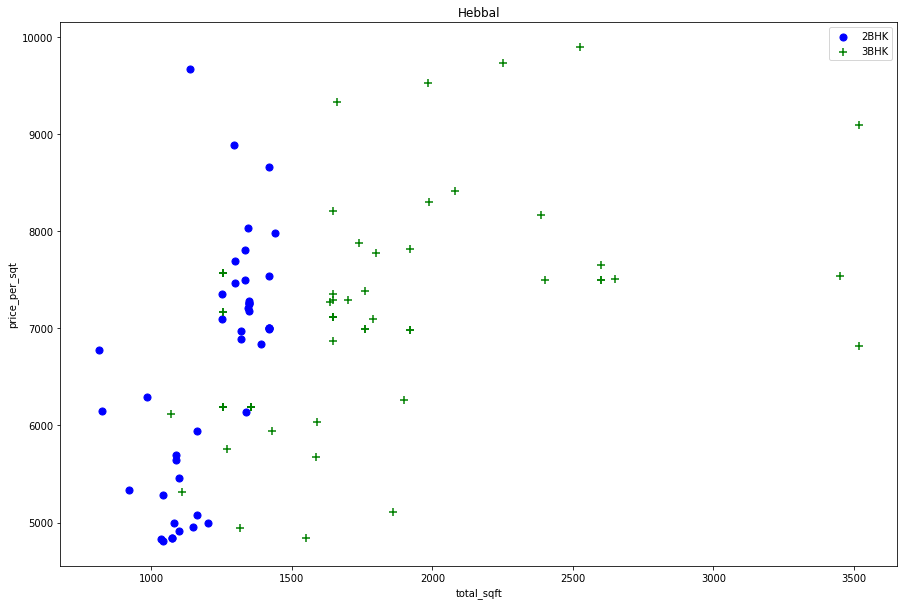

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

def plot_scatter_chart(df, location):
     bhk2 = df[(df.location == location) & (df.BHK == 2)]
     bhk3 = df[(df.location == location) & (df.BHK == 3)]
     matplotlib.rcParams['figure.figsize'] = (15, 10)
     plt.scatter(bhk2.total_sqft, bhk2.price_per_sqt, color='blue', label='2BHK', s=50)
     plt.scatter(bhk3.total_sqft, bhk3.price_per_sqt,marker="+", color='green', label='3BHK', s=50)
     plt.xlabel('total_sqft')
     plt.ylabel('price_per_sqt')
     plt.title(location)
     plt.legend()

plot_scatter_chart(df5, "Hebbal")


**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [51]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stat={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stat[bhk]={
                'mean': np.mean(bhk_df.price_per_sqt),
                'std': np.std((bhk_df.price_per_sqt)),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stat= bhk_stat.get(bhk-1)
            if stat and stat['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqt<(stat['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6=remove_bhk_outlier(df5)
df6.shape
    

(7259, 7)

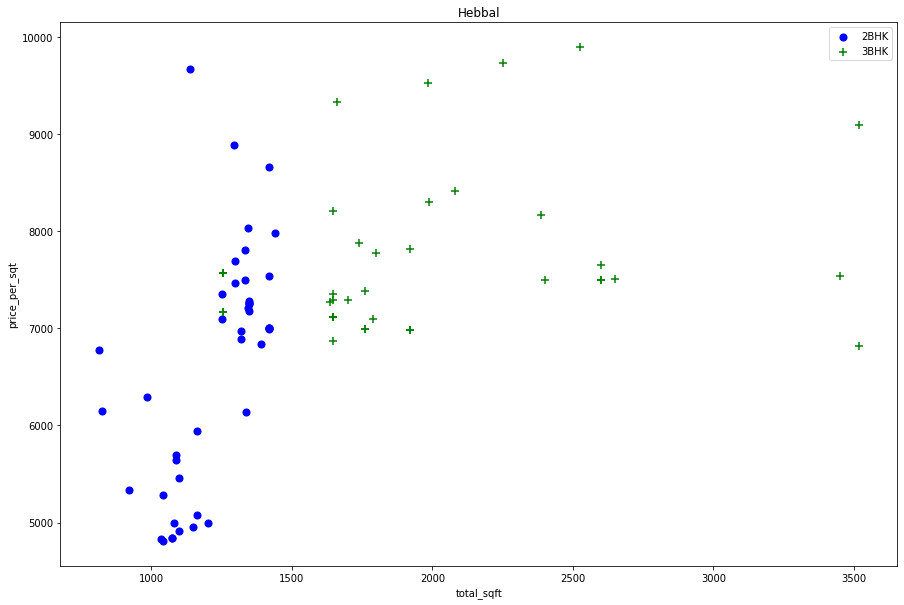

In [52]:
plot_scatter_chart(df6,"Hebbal")

In [53]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqt
583,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5288,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8449,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8535,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9230,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9541,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**it is not normal having bhk+2< bathroom so we remove them**


Text(0, 0.5, 'count')

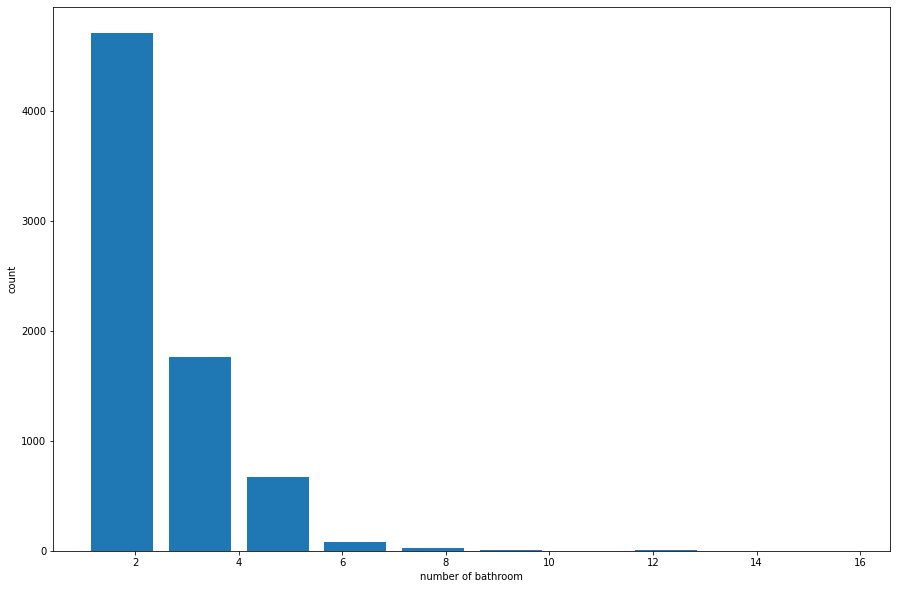

In [54]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("number of bathroom")
plt.ylabel("count")

In [55]:
df7=df6[df6.bath<df6.BHK+2]
df7.shape

(7186, 7)

**Now we have to start prepare it for ml traning so we drop some feature like price_per_sqt and size**

In [56]:
df7=df7.drop(['price_per_sqt','size'],axis=1)
df7

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10111,other,1200.0,2.0,70.0,2
10112,other,1800.0,1.0,200.0,1
10115,other,1353.0,2.0,110.0,2
10116,other,812.0,1.0,26.0,1


In [57]:
df7.to_csv("Data_after_Processing")

# Use One Hot Encoding For Location

In [58]:
dummey=pd.get_dummies(df7.location)
df8=pd.concat([df7,dummey.drop('other',axis='columns')],axis='columns')

In [59]:
df8=df8.drop('location',axis='columns')


# Build a Model Now..

create variable X contain all independent variable 

In [62]:
X=df8.drop('price',axis='columns')
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10112,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10115,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10116,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
Y=df8.price
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10111     70.0
10112    200.0
10115    110.0
10116     26.0
10119    400.0
Name: price, Length: 7186, dtype: float64

Text(0, 0.5, 'price')

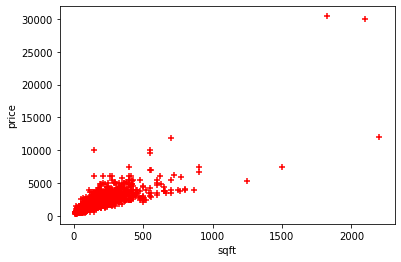

In [64]:
%matplotlib inline
plt.scatter(df7.price,df7.total_sqft,color='red',marker='+')
plt.xlabel('sqft')
plt.ylabel('price')

#Traning

**Dividing the data for Training and Testing**

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8347789557045424

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([ 8.62469128e-01,  8.33912690e-01,  8.37745007e-01, -1.84300990e+15,
        8.02008730e-01])

# Find best model using GridSearchCV

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression' : {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())
            ]),
            'params': {
                'linear_regression__copy_X': [True, False],
                'linear_regression__fit_intercept': [True, False],
                'linear_regression__n_jobs': [None],
                'linear_regression__positive': [False]
            }  # Closing brace was missing here
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and Y are defined somewhere else
find_best_model_using_gridsearchcv(X, Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\Anaconda3\lib\site-packages\

,model,best_score,best_params
0,linear_regression,-8.521966e+18,"{'linear_regression__copy_X': True, 'linear_re..."
1,lasso,7.131089e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,7.293720e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# Test the model for few properties


In [74]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [75]:
predict_price('Indira Nagar',3000, 3, 4)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


346.23627071990927

In [76]:
predict_price('1st Phase JP Nagar',1000, 3, 3)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.97308279397308

# Export the tested model to a pickle file

In [77]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))